In [1]:
# load libraries
import gym
import matplotlib.pyplot as plt
import numpy as np
import random

env = gym.make("Taxi-v3").env
env.reset()

463

In [2]:
# Q-Learning function
def QLearning(env, alpha, gamma, epsilon, min_epsilon, max_epsilon, decay, episodes, steps, Q):
    rewardsList = [] # record rewards for plot
    for episode in range(episodes):
        state = env.reset()    
        total_rewards = 0
        for i in range(steps):
            if random.uniform(0, 1) > epsilon:
                action = np.argmax(Q[state,:]) #exploit       
            else:
                action = env.action_space.sample() #explore
            nextState, reward, done, info = env.step(action)
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[nextState, :]) - Q[state, action]) #Bellman
            total_rewards += reward      
            state = nextState
            if done == True:
                break    
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode) #exponentially decaying epsilon
        rewardsList.append(total_rewards)

    print ("Averaged rewards: " + str(sum(rewardsList)/episodes))
    rewardplot(rewardsList, episodes)
    return Q

# plotting function
def rewardplot(rewardsList, episodes):
    x = range(episodes)
    plt.plot(x, rewardsList)
    plt.xlabel('Episode #')
    plt.ylabel('Reward')
    plt.title('Rewards vs Episode') 
    plt.show()

Averaged rewards: -3.0974


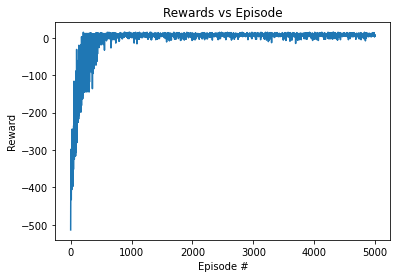

In [3]:
def main():
    # 500 observation spaces (discrete)
    # = 25 taxi positions X 5 passenger locations X 4 destinations
    numOS = env.observation_space.n

    # 6 action positions (discrete)
    numAS = env.action_space.n

    # initialize Q table with zeros
    Q = np.zeros((numOS, numAS))

    # hyperparameters
    alpha = 0.7                
    gamma = 0.6               
    epsilon = 1                  
    max_epsilon = 1
    min_epsilon = 0.01         
    decay = 0.01         

    episodes = 5000    
    steps = 100

    Q = QLearning(env, alpha, gamma, epsilon, min_epsilon, max_epsilon, decay, episodes, steps, Q)
    return Q

if __name__ == "__main__":
    Q = main()

In [4]:
from IPython.display import clear_output
from time import sleep

print("\n Random Actions")
sleep(1)
clear_output(wait=True)

# random render
for i in range(5):
    state = env.reset()
    env.s = state
    done = False
    for j in range(10):
        print("RANDOM")
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        env.render()
        sleep(0.4)
        clear_output(wait=True)

print("\n Learned Actions")
sleep(1)
clear_output(wait=True)

# learned render
for i in range(5):
    state = env.reset()
    env.s = state
    done = False
    while not done:
        print("LEARNED")
        action = np.argmax(Q[state,:])
        state, reward, done, info = env.step(action)
        env.render()
        sleep(0.4)
        clear_output(wait=True)



LEARNED
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [5]:
# suppressed video export method #1
"""
env = gym.make("Taxi-v3")
env = gym.wrappers.Monitor(env, './video', force=True)
env.reset()
while True:
    action = np.argmax(Q[state,:])
    state, reward, done, info = env.step(action)
    if done:
        break
env.close()
"""

'\nenv = gym.make("Taxi-v3")\nenv = gym.wrappers.Monitor(env, \'./video\', force=True)\nenv.reset()\nwhile True:\n    action = np.argmax(Q[state,:])\n    state, reward, done, info = env.step(action)\n    if done:\n        break\nenv.close()\n'

In [6]:
# suppressed video export method #2
"""
def wrap_env(env):
  env = wrappers.Monitor(env, './video', force=True)
  return env

env = gym.make("Taxi-v3")
env = wrap_env(env)

total_reward = 0.0
total_steps = 0
state = env.reset()
env.s = state

done = False

while True:
    action = np.argmax(Q[state,:])
    state, reward, done, _ = env.step(action)
    env.render()
    sleep(0.5)
    clear_output(wait=True)
    total_reward += reward
    total_steps += 1
    if done:
        break

print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))
env.close()
env.env.close()
"""

'\ndef wrap_env(env):\n  env = wrappers.Monitor(env, \'./video\', force=True)\n  return env\n\nenv = gym.make("Taxi-v3")\nenv = wrap_env(env)\n\ntotal_reward = 0.0\ntotal_steps = 0\nstate = env.reset()\nenv.s = state\n\ndone = False\n\nwhile True:\n    action = np.argmax(Q[state,:])\n    state, reward, done, _ = env.step(action)\n    env.render()\n    sleep(0.5)\n    clear_output(wait=True)\n    total_reward += reward\n    total_steps += 1\n    if done:\n        break\n\nprint("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))\nenv.close()\nenv.env.close()\n'